In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
#LogitBoost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
# import xgboost as xgb


In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [4]:
x=pd.read_csv("X.csv")
y=pd.read_csv("Y.csv")

In [5]:
rifX=x
rifY=y["RIF"]
print(type(rifY))

<class 'pandas.core.series.Series'>


In [33]:
type(rifX)

pandas.core.frame.DataFrame

In [6]:
rifX.shape

(3393, 222)

Concatenating features with labels

In [7]:
rifConcatenated=pd.concat([rifX,rifY],axis=1)
rifConcatenated

,DEL_CF_410280_d918T_307_iniB,DEL_CF_4408101_d102C_34_gid,DEL_F_4408101_d101C_gid_G34G,INS_CF_4242820_i2957G_986_embC,INS_F_409772_i410ATCT_iniB_G137G,INS_F_4247020_i506CC_embB_G169G,INS_F_4247970_i1456GT_embB_G486G,INS_N_4243642_i409GTCCCGGGGCGCCAC_embA_S137S,INS_P_3074519_G.117_thyA,INS_P_3074521_G.115_thyA,...,ahpC_NC_snp,ahpC_C_snp,gid_C_snp,iniA_C_snp,gyrB_F_indel,embC_C_snp,eis_NC_snp,rpsA_C_snp,rrl-rrs_NC_snp,RIF
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,1,1,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
rifConcatenated.shape

(3393, 223)

Checking duplicate rows

In [9]:
rifConcatenated.duplicated().value_counts()

False    2779
True      614
dtype: int64

Dropping Duplicate rows

In [10]:
rifConcatenated=rifConcatenated.drop_duplicates()
rifConcatenated.shape

(2779, 223)

Count of invalid labeled rows (label with -1 are invalid rows)

In [11]:
(rifConcatenated["RIF"]==-1).value_counts()

False    2725
True       54
Name: RIF, dtype: int64

Rows with invalid labels

In [12]:
invalidRows=rifConcatenated[rifConcatenated["RIF"]==-1]

In [13]:
invalidRows.index

Int64Index([ 313,  320,  346,  360,  381,  395,  397,  398,  403,  808, 1373,
            1586, 1588, 1706, 1715, 1717, 1800, 1857, 1902, 1945, 2190, 2355,
            2383, 2429, 2630, 2899, 2932, 2935, 3078, 3099, 3100, 3103, 3106,
            3109, 3112, 3118, 3125, 3128, 3131, 3135, 3139, 3155, 3189, 3214,
            3221, 3229, 3235, 3240, 3241, 3242, 3246, 3258, 3259, 3261],
           dtype='int64')

Dropping invalid labeled rows 

In [14]:
rifFiltered=rifConcatenated.drop(invalidRows.index)
rifFiltered.shape

(2725, 223)

Splitting the data into X and Y

In [15]:
rifX=rifFiltered.iloc[:,0:222]
rifY=rifFiltered.iloc[:,[222]]
rifY.shape

(2725, 1)

In [16]:
rifY=(rifY.values).reshape(-1,)
type(rifX)
rifY.shape

(2725,)

In [17]:
rifY.shape

(2725,)

finding imbalance

1    1456
0    1269
Name: RIF, dtype: int64


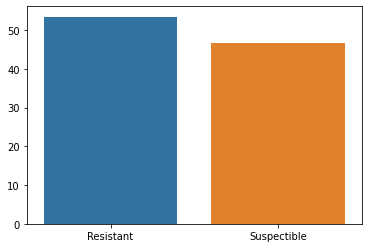

In [18]:
counts=rifFiltered['RIF'].value_counts()
print(counts)
proportions = counts / counts.sum()
proportions=proportions*100
sns.barplot(x=["Resistant","Suspectible"],y=proportions.values)
plt.show()

In [19]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a synthetic pandas Series with binary features
X=rifX

# Create a synthetic binary output
y = rifY

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(16, activation='relu', input_dim=X_train.shape[1]),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Test accuracy: {accuracy:.2f}")


Epoch 1/10
55/55 [==============================] - 1s 5ms/step - loss: 0.5663 - accuracy: 0.8767 - val_loss: 0.4248 - val_accuracy: 0.8807
Epoch 2/10
55/55 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8870 - val_loss: 0.2934 - val_accuracy: 0.8830
Epoch 3/10
55/55 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.9002 - val_loss: 0.2314 - val_accuracy: 0.9106
Epoch 4/10
55/55 [==============================] - 0s 3ms/step - loss: 0.1926 - accuracy: 0.9226 - val_loss: 0.1828 - val_accuracy: 0.9335
Epoch 5/10
55/55 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9409 - val_loss: 0.1522 - val_accuracy: 0.9495
Epoch 6/10
55/55 [==============================] - 0s 2ms/step - loss: 0.1357 - accuracy: 0.9524 - val_loss: 0.1368 - val_accuracy: 0.9541
Epoch 7/10
55/55 [==============================] - 0s 2ms/step - loss: 0.1193 - accuracy: 0.9570 - val_loss: 0.1267 - val_accuracy: 0.9564
Epoch 8/10
55/55 [==

In [20]:
rifX_train,rifX_test,rifY_train,rifY_test=train_test_split(rifX,rifY,test_size=0.2,random_state=21)
print(rifX.shape)
print(rifY.shape)
print(rifX_train.shape)
print(rifX_test.shape)
print(rifY_train.shape)
print(rifY_test.shape)

(2725, 222)
(2725,)
(2180, 222)
(545, 222)
(2180,)
(545,)


#parameter tuning for random forest

In [21]:
model1=RandomForestClassifier()
param_grid = {
    'n_estimators': [30,50, 100],
    'max_depth': [None, 5, 10],
}
grid_search = GridSearchCV(model1, param_grid=param_grid, cv=5, n_jobs=-1,scoring='roc_auc')
grid_search.fit(rifX, rifY)
print(grid_search.best_params_)

{'max_depth': 5, 'n_estimators': 100}


parameter tuning for svm

In [22]:
model2=svm.SVC()
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(model2, param_grid, refit=True, verbose=0, cv=5,scoring='roc_auc')
grid_search.fit(rifX, rifY)
print(grid_search.best_params_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


parameter tuning for logistic regression

In [23]:
# model3=LogisticRegression()
# param_grid = {'C': [ 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
# grid_search = GridSearchCV(model3, param_grid=param_grid,cv=5,verbose=0)
# grid_search.fit(rifX, rifY)
# print(grid_search.best_params_)

#parameter Tuning for GradientBoosting

In [24]:
model5=GradientBoostingClassifier()
param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(model5, param_grid=param_grid, cv=5,scoring='roc_auc')
grid_search.fit(rifX, rifY)
print(grid_search.best_params_)

{'learning_rate': 0.1, 'n_estimators': 100}


# parameter tuning for BernoulliNB

In [25]:
model4=BernoulliNB()
param_grid = {'alpha': [0.1, 1, 10]}
grid_search = GridSearchCV(model4, param_grid=param_grid, cv=5,scoring='roc_auc')
grid_search.fit(rifX, rifY)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'alpha': 10}


# model1 (random forest)

# model 2 (svm)

SVM
--------------------
accuracy  0.9577981651376147
f1_score  0.962233169129721
auc  0.956638845702752
precision  0.9575163398692811
sensitivity  0.966996699669967
specificity  0.03300330033003296


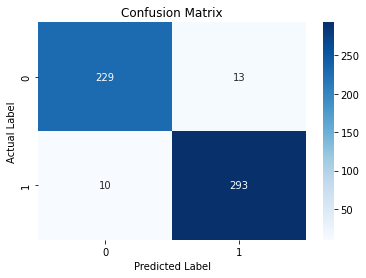

In [26]:
rifModel2=svm.SVC(kernel="linear",C= 0.1, gamma= 0.1)
rifModel2.fit(rifX_train,rifY_train)
rifPred=rifModel2.predict(rifX_test)
print("SVM")
print("--------------------")
print("accuracy ", accuracy_score(rifY_test,rifPred))
print("f1_score ", f1_score(rifY_test,rifPred))
print("auc ", roc_auc_score(rifY_test,rifPred))
print("precision ",precision_score(rifY_test,rifPred))
print("sensitivity ",recall_score(rifY_test,rifPred))
print("specificity ",1-recall_score(rifY_test,rifPred))
cm=(confusion_matrix(rifY_test,rifPred))
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# model 3 (Logistic regression)

Logistic Regression
--------------------
accuracy  0.9596330275229358
f1_score  0.9638157894736842
auc  0.9587049614052314
precision  0.9606557377049181
sensitivity  0.966996699669967
specificity  0.03300330033003296


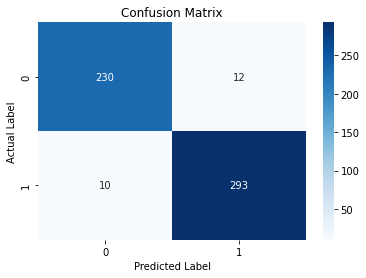

In [27]:
rifModel3=LogisticRegression()
rifModel3.fit(rifX_train,rifY_train)
rifPred=rifModel3.predict(rifX_test)
print("Logistic Regression")
print("--------------------")
print("accuracy ", accuracy_score(rifY_test,rifPred))
print("f1_score ", f1_score(rifY_test,rifPred))
print("auc ", roc_auc_score(rifY_test,rifPred))
print("precision ",precision_score(rifY_test,rifPred))
print("sensitivity ",recall_score(rifY_test,rifPred))
print("specificity ",1-recall_score(rifY_test,rifPred))
cm=(confusion_matrix(rifY_test,rifPred))
cm=(confusion_matrix(rifY_test,rifPred))
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# model4 (bernoulliNB)


BernoulliNB
--------------------
accuracy  0.8935779816513761
f1_score  0.9010238907849829
auc  0.8963873660093281
precision  0.9328621908127208
sensitivity  0.8712871287128713
specificity  0.12871287128712872


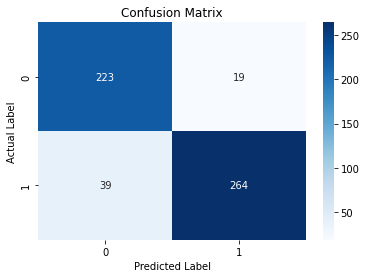

In [28]:
rifModel4=BernoulliNB(alpha=10)
rifModel4.fit(rifX_train,rifY_train)
rifPred=rifModel4.predict(rifX_test)
print("BernoulliNB")
print("--------------------")
print("accuracy ", accuracy_score(rifY_test,rifPred))
print("f1_score ", f1_score(rifY_test,rifPred))
print("auc ", roc_auc_score(rifY_test,rifPred))
print("precision ",precision_score(rifY_test,rifPred))
print("sensitivity ",recall_score(rifY_test,rifPred))
print("specificity ",1-recall_score(rifY_test,rifPred))
cm=(confusion_matrix(rifY_test,rifPred))
cm=(confusion_matrix(rifY_test,rifPred))
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# model5 (GradientBoosting)

GradientBoostingClassifier
--------------------
accuracy  0.9651376146788991
f1_score  0.9689034369885435
auc  0.9636554564547364
precision  0.961038961038961
sensitivity  0.976897689768977
specificity  0.02310231023102305


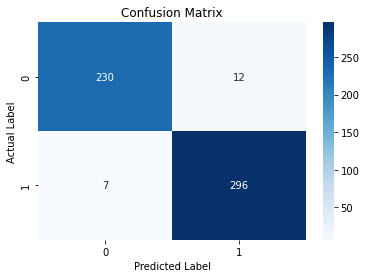

In [29]:
rifModel5=GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 100)
rifModel5.fit(rifX_train,rifY_train)
rifPred=rifModel5.predict(rifX_test)
print("GradientBoostingClassifier")
print("--------------------")
print("accuracy ", accuracy_score(rifY_test,rifPred))
print("f1_score ", f1_score(rifY_test,rifPred))
print("auc ", roc_auc_score(rifY_test,rifPred))
print("precision ",precision_score(rifY_test,rifPred))
print("sensitivity ",recall_score(rifY_test,rifPred))
print("specificity ",1-recall_score(rifY_test,rifPred))
cm=(confusion_matrix(rifY_test,rifPred))
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Gradient Boosting technique on Decision Trees

In [30]:

def gradientBoosting(num,alpha):
 n_estimators = num  
 learning_rate = alpha  
 base_learners = []
 target = rifY_train.copy()
    
 for _ in range(n_estimators):
    tree = DecisionTreeClassifier(max_depth=5, random_state=42)
    tree.fit(rifX_train, target)
    tree_predictions = tree.predict(rifX_train)
    target -= (learning_rate * tree_predictions).astype(np.int64)
    base_learners.append(tree)
    
  
 y_pred = np.zeros_like(rifY_test, dtype=np.float64)


 
 for tree in base_learners:
    y_pred += (learning_rate * tree.predict(rifX_test))
    
 print(len(y_pred))

 y_pred_class = (y_pred >= 0.5)

 print("Iterative Gradient Boosting GradientBoostingClassifier with {} DecisionTrees and Learning Rate of{}".format(num,alpha))
 print("--------------------")
 accuracy = accuracy_score(rifY_test, y_pred_class)
 print(f"Accuracy : {accuracy:.2f}")
 print("f1_score ", f1_score(rifY_test,y_pred_class))
 print("auc ", roc_auc_score(rifY_test,y_pred_class))
 print("precision ",precision_score(rifY_test,y_pred_class))
 print("sensitivity ",recall_score(rifY_test,y_pred_class)) 
 print("specificity ",1-recall_score(rifY_test,y_pred_class))
 cm=(confusion_matrix(rifY_test,y_pred_class))
 sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")
 plt.title("Confusion Matrix")
 plt.xlabel("Predicted Label")
 plt.ylabel("Actual Label")
 plt.show()



545
Iterative Gradient Boosting GradientBoostingClassifier with 100 DecisionTrees and Learning Rate of0.1
--------------------
Accuracy : 0.94
f1_score  0.9427168576104746
auc  0.9339252107028885
precision  0.935064935064935
sensitivity  0.9504950495049505
specificity  0.04950495049504955


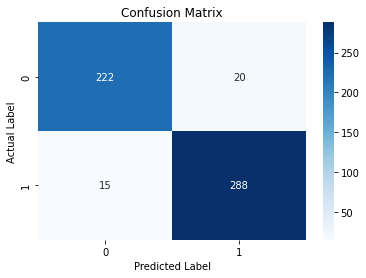

In [31]:
gradientBoosting(100,0.1)


# model6 (Ada Boost)

In [34]:
type(rifY)

numpy.ndarray

In [36]:
type(rifX_train)

pandas.core.frame.DataFrame

In [37]:
type(rifY_train)
type(rifY_test)

numpy.ndarray

Ada Boost Classifier forest
--------------------
accuracy  0.9302752293577982
f1_score  0.9391025641025641
auc  0.925647110165562
precision  0.9127725856697819
sensitivity  0.966996699669967
specificity  0.03300330033003296


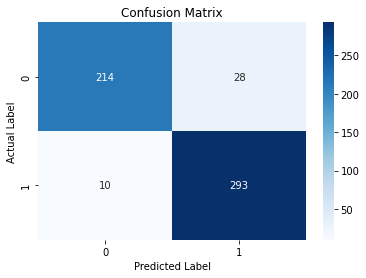

In [32]:
rifModel6=AdaBoostClassifier(n_estimators=50, base_estimator=svm.SVC(probability=True, kernel='linear'),learning_rate=1)
rifModel6.fit(rifX_train,rifY_train)
rifPred=rifModel6.predict(rifX_test)
print("Ada Boost Classifier forest")
print("--------------------")
print("accuracy ", accuracy_score(rifY_test,rifPred))
print("f1_score ", f1_score(rifY_test,rifPred))
print("auc ", roc_auc_score(rifY_test,rifPred))
print("precision ",precision_score(rifY_test,rifPred))
print("sensitivity ",recall_score(rifY_test,rifPred))
print("specificity ",1-recall_score(rifY_test,rifPred))
cm=(confusion_matrix(rifY_test,rifPred))
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Ada Boost technique on DecisionTrees

Accuracy on the test set: 0.89


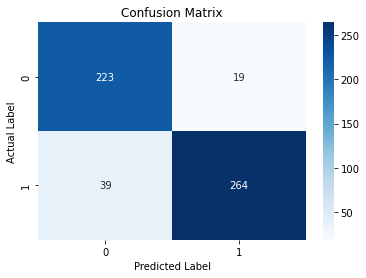

In [46]:
def ada_boost_classifier(n_estimators, X_train, y_train, X_test):
    # 
    m = X_train.shape[0]
    #Base Initailization
    w = np.ones(m) / m
    base_classifiers = []
    alphas = []
   
    for _ in range(n_estimators):
#Create a decision stump using a weighted Gini index
        classifier = DecisionTreeClassifier(max_depth=1)
        classifier.fit(X_train, y_train, sample_weight=w)
        predictions = classifier.predict(X_train)   
#psuedo residual Computation
        error = np.sum(w * (predictions != y_train)) / np.sum(w)      
#Amount of say for each tree vaiers ==>need to be stored
        alpha = 0.5 * np.log((1 - error) / error)
# residual or weights updation
        w = w * np.exp(-alpha * y_train * predictions)
        w /= np.sum(w)
        base_classifiers.append(classifier)
        alphas.append(alpha)
        

    
    y_pred = np.zeros(X_test.shape[0])
    
    for i in range(n_estimators):
        y_pred += alphas[i] * base_classifiers[i].predict(X_test)
    
    # Final predictions using sign function
    y_pred_final = np.sign(y_pred)
    return y_pred_final


y_pred_test = ada_boost_classifier(500,X_train=rifX_train, y_train=rifY_train, X_test=rifX_test)
accuracy = accuracy_score(rifY_test, y_pred_test)
print(f"Accuracy on the test set: {accuracy:.2f}")
cm=(confusion_matrix(rifY_test,y_pred_test))
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()



# model7 (XG-Boosting)

XGBoost Classifier
--------------------
accuracy  0.9669724770642202
f1_score  0.9704918032786886
auc  0.9657215721572158
precision  0.9641693811074918
sensitivity  0.976897689768977
specificity  0.02310231023102305


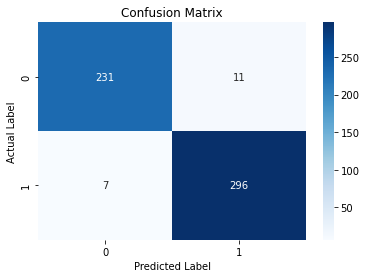

In [76]:
rifModel7= xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)
rifModel7.fit(X_train, y_train)

rifModel7.fit(rifX_train,rifY_train)
rifPred=rifModel7.predict(rifX_test)
print("XGBoost Classifier")
print("--------------------")
print("accuracy ", accuracy_score(rifY_test,rifPred))
print("f1_score ", f1_score(rifY_test,rifPred))
print("auc ", roc_auc_score(rifY_test,rifPred))
print("precision ",precision_score(rifY_test,rifPred))
print("sensitivity ",recall_score(rifY_test,rifPred))
print("specificity ",1-recall_score(rifY_test,rifPred))
cm=(confusion_matrix(rifY_test,rifPred))
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

Iterative XGBoost Classifier with 50 Decision Trees and Learning Rate of 0.1
--------------------
Accuracy: 0.92
f1_score:  0.9297124600638977
auc:  0.9140823173226413
precision:  0.9009287925696594
sensitivity:  0.9603960396039604
specificity:  0.03960396039603964


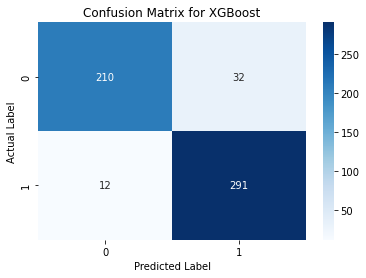

In [105]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def iterative_xgboost_classifier(num, alpha, rifX_train, rifY_train, rifX_test, rifY_test):
    base_learners = []
    target = rifY_train.copy()

    for _ in range(num):
        xgb_classifier = XGBClassifier(
            n_estimators=1,  # Using a single decision tree as the base learner
            objective='binary:logistic',
            tree_method='hist',
            learning_rate=alpha,
            max_depth=3,
            enable_categorical=True,
            base_score=np.mean(target)  # Initial prediction based on class distribution
        )
        xgb_classifier.fit(rifX_train, target)
        xgb_predictions = xgb_classifier.predict(rifX_train)
        target -= (alpha * xgb_predictions).astype(np.int64)
        base_learners.append(xgb_classifier)

    y_pred = np.zeros_like(rifY_test, dtype=np.float64)

    for xgb_classifier in base_learners:
        y_pred += alpha * xgb_classifier.predict(rifX_test)

    y_pred_class = (y_pred >= 0.5)

    print("Iterative XGBoost Classifier with {} Decision Trees and Learning Rate of {}".format(num, alpha))
    print("--------------------")
    accuracy = accuracy_score(rifY_test, y_pred_class)
    print(f"Accuracy: {accuracy:.2f}")
    print("f1_score: ", f1_score(rifY_test, y_pred_class))
    print("auc: ", roc_auc_score(rifY_test, y_pred_class))
    print("precision: ", precision_score(rifY_test, y_pred_class))
    print("sensitivity: ", recall_score(rifY_test, y_pred_class))
    print("specificity: ", 1 - recall_score(rifY_test, y_pred_class))
    cm = confusion_matrix(rifY_test, y_pred_class)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title("Confusion Matrix for XGBoost")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()

# Example usage:
iterative_xgboost_classifier(50, 0.1, rifX_train, rifY_train, rifX_test, rifY_test)


# evaluating using cross_validation_score with folds=30

In [54]:
# from sklearn.model_selection import cross_val_score

In [55]:
# print("Random Forest")
# aucScores=cross_val_score(rifModel1, rifX, rifY, cv=30, scoring="roc_auc")
# f1Scores = cross_val_score(rifModel1, rifX, rifY, cv=30, scoring='f1')
# print("Mean f1_score ",f1Scores.mean())
# print("Mean auc ",aucScores.mean())

In [56]:
# print("SVM")
# aucScores=cross_val_score(rifModel2, rifX, rifY, cv=30, scoring="roc_auc")
# f1Scores = cross_val_score(rifModel2, rifX, rifY, cv=30, scoring='f1')
# print("Mean f1_score ",f1Scores.mean())
# print("Mean auc ",aucScores.mean())

In [57]:
# print("Logistic Regression")
# aucScores=cross_val_score(rifModel3, rifX, rifY, cv=20, scoring="roc_auc")
# f1Scores = cross_val_score(rifModel3, rifX, rifY, cv=20, scoring='f1')
# print("Mean f1_score ",f1Scores.mean())
# print("Mean auc ",aucScores.mean())
# # print(aucScores)

In [58]:
# print("BernoulliNB")
# aucScores=cross_val_score(rifModel4, rifX, rifY, cv=30, scoring="roc_auc")
# f1Scores = cross_val_score(rifModel4, rifX, rifY, cv=30, scoring='f1')
# print("Mean f1_score ",f1Scores.mean())
# print("Mean auc ",aucScores.mean())
# # print(aucScores)

In [59]:
# print("GradientBoostingClassifier")
# aucScores=cross_val_score(rifModel5, rifX, rifY, cv=30, scoring="roc_auc")
# f1Scores = cross_val_score(rifModel5, rifX, rifY, cv=30, scoring='f1')
# print("Mean f1_score ",f1Scores.mean())
# print("Mean auc ",aucScores.mean())


# 1D CNN 

In [60]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load your dataset (replace with your own data loading code)
X = rifX
y = rifY

# Assuming you have categorical labels, convert them to one-hot encoding
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)

# Split the data into three parts (adjust the split ratios as needed)
X1, X2, X3, y1, y2, y3 = train_test_split(X, y, test_size=0.2, random_state=42)
X4, X5, X6, y4, y5, y6 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Define a function to create a 1D CNN model
def create_cnn_model(input_shape):
    model = tf.keras.Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    return model

# Create three separate CNN models
input_shape = X.shape[1:]  # Input shape for the CNN
cnn_model1 = create_cnn_model(input_shape)
cnn_model2 = create_cnn_model(input_shape)
cnn_model3 = create_cnn_model(input_shape)

# Combine the outputs from the CNN models
merged = concatenate([cnn_model1.output, cnn_model2.output, cnn_model3.output])

# Add fully connected layers for classification
x = Dense(128, activation='relu')(merged)
x = Dense(64, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

# Create the final model
final_model = Model(inputs=[cnn_model1.input, cnn_model2.input, cnn_model3.input], outputs=output)

# Compile the final model
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the final model using the three datasets in parallel
final_model.fit([X4, X5, X6], y4, validation_data=([X2, X3, X6], y2), epochs=10, batch_size=64)

# Evaluate the final model on the test data
test_loss, test_accuracy = final_model.evaluate([X1, X2, X3], y1)
print(f"Test Accuracy: {test_accuracy:.2f}")


ValueError: not enough values to unpack (expected 6, got 4)

In [ ]:
# implement 1d cnn
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load your dataset (replace with your own data loading code)
X = rifX
y = rifY


# Assuming you have categorical labels, convert them to one-hot encoding
num_classes = len(np.unique(y))
y = to_categorical(y, num_classes)

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
